In [2]:
%load_ext autoreload
%autoreload 2


import io
import os
import sys
import IPython.display
import PIL.Image
from pprint import pformat

import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import tensorflow_hub as hub

dir2 = os.path.abspath('..')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: 
    sys.path.append(dir1)
    
from research.scripts.bigbigan import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
G:\Github Repositories\Neurophysiological-Data-Decoding\research G:\Github Repositories\Neurophysiological-Data-Decoding


In [3]:
module_path = 'https://tfhub.dev/deepmind/bigbigan-resnet50/1'  # ResNet-50
# module_path = 'https://tfhub.dev/deepmind/bigbigan-revnet50x4/1'  # RevNet-50 x4

# module = hub.Module(module_path, trainable=True, tags={'train'})  # training
module = hub.Module(module_path)  # inference

for signature in module.get_signature_names():
    print('Signature:', signature)
    print('Inputs:', pformat(module.get_input_info_dict(signature)))
    print('Outputs:', pformat(module.get_output_info_dict(signature)))
    print()

Signature: encode
Inputs: {'x': <hub.ParsedTensorInfo shape=(?, 256, 256, 3) dtype=float32 is_sparse=False>}
Outputs: {'avepool_feat': <hub.ParsedTensorInfo shape=(?, 2048) dtype=float32 is_sparse=False>,
 'bn_crelu_feat': <hub.ParsedTensorInfo shape=(?, 4096) dtype=float32 is_sparse=False>,
 'default': <hub.ParsedTensorInfo shape=(?, 120) dtype=float32 is_sparse=False>,
 'z_mean': <hub.ParsedTensorInfo shape=(?, 120) dtype=float32 is_sparse=False>,
 'z_sample': <hub.ParsedTensorInfo shape=(?, 120) dtype=float32 is_sparse=False>,
 'z_stdev': <hub.ParsedTensorInfo shape=(?, 120) dtype=float32 is_sparse=False>}

Signature: discriminate
Inputs: {'x': <hub.ParsedTensorInfo shape=(?, 128, 128, 3) dtype=float32 is_sparse=False>,
 'z': <hub.ParsedTensorInfo shape=(?, 120) dtype=float32 is_sparse=False>}
Outputs: {'score_x': <hub.ParsedTensorInfo shape=(?,) dtype=float32 is_sparse=False>,
 'score_xz': <hub.ParsedTensorInfo shape=(?,) dtype=float32 is_sparse=False>,
 'score_z': <hub.ParsedTenso

In [4]:
bigbigan = BigBiGAN(module)

# Make input placeholders for x (`enc_ph`) and z (`gen_ph`).
enc_ph = bigbigan.make_encoder_ph()
gen_ph = bigbigan.make_generator_ph()

# Compute samples G(z) from encoder input z (`gen_ph`).
gen_samples = bigbigan.generate(gen_ph)

# Compute reconstructions G(E(x)) of encoder input x (`enc_ph`).
recon_x = bigbigan.reconstruct_x(enc_ph, upsample=True)

# Compute encoder features used for representation learning evaluations given
# encoder input x (`enc_ph`).
enc_features = bigbigan.encode(enc_ph, return_all_features=True)

# Compute discriminator scores for encoder pairs (x, E(x)) given x (`enc_ph`)
# and generator pairs (G(z), z) given z (`gen_ph`).
disc_scores_enc = bigbigan.discriminate(*bigbigan.enc_pairs_for_disc(enc_ph))
disc_scores_gen = bigbigan.discriminate(*bigbigan.gen_pairs_for_disc(gen_ph))

# Compute losses.
losses = bigbigan.losses(enc_ph, gen_ph)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

samples shape: (32, 128, 128, 3)


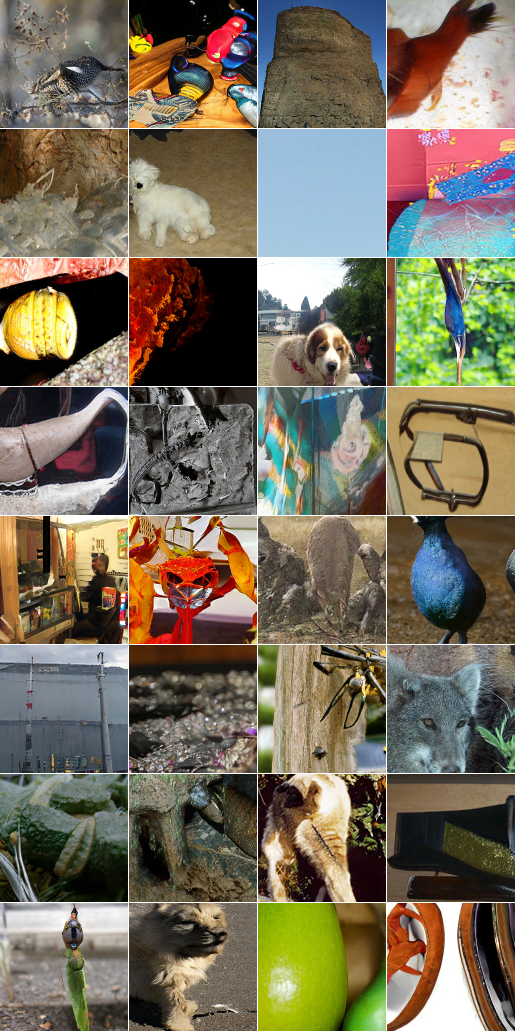

In [6]:
feed_dict = {gen_ph: np.random.randn(32, 120)}
_out_samples = sess.run(gen_samples, feed_dict=feed_dict)
print('samples shape:', _out_samples.shape)
imshow(imgrid(image_to_uint8(_out_samples), cols=4))